# Домашнее задание 1 (30 + 25 + 12 + 17 + 22 + 20 = 126 pts)

## Задача 1 (30 pts)

- (5 pts) Докажите, что $\| A \|_F \le \sqrt{\mathrm{rank}(A)} \| A \|_2$.
- (5 pts) Покажите, что для любых $m, n$ и $k \le \min(m, n)$ существует $A \in \mathbb{R}^{m \times n}: \mathrm{rank}(A) = k$, такая что $\| A \|_F = \sqrt{\mathrm{rank}(A)} \| A \|_2$.
- (5 pts) Докажите, что если $\mathrm{rank}(A) = 1$, то $\| A \|_F  = \| A \|_2$.
- (5 pts) Докажите, что $\| A B \|_F \le \| A \|_2 \| B \|_F$.
- (5 pts) Для векторов важным дополнительным свойством является количество ненулевых элементов. В задаче решения недоопределённой системы линейных уравнений это свойство является одним из возможных дополнительных условий на решение. Аналогичная задача для матриц – это поиск наилучшего приближения данной матрицы с минимальным рангом. То есть аналогом разреженности для векторов является малоранговость для матриц. Возникает вопрос, какая норма является аналогичной первой векторной нормы? Ответом является так называемая ядерная норма 

$$\|A\|_{nuclear} = \sum_{i=1}^n \sigma_i, $$

где $\sigma_i$ – сингулярные числа матрицы $A$. Покажите, что это выражение действительно является нормой.

- (2 pts) Докажите, что для любой эрмитовой матрицы сингулярные числа совпадают с абсолютными значениями собственных значений. Выполнено ли это для произвольной матрицы? Докажите, что выполнено или приведите контрпример.

- (3 pts) Найдите скелетное разложение матрицы $\begin{pmatrix} 1 & -2 & 5 \\ 5 & 3 & 9 \\ 3 & 7 & -1\end{pmatrix}$.

## Задача 2. LU разложение (25 pts)

### 1. LU разложение для ленточных матриц 

Сложность вычисления LU разложения для матрицы размера $n\times n$ – $\mathcal{O}(n^3)$.
Существенного уменьшения сложности можно добиться для матриц определённой структуры, например разреженных. 
В этой задаче рассмотрим специальный класс разреженных матриц, а именно ленточные матрицы с шириной ленты 3 и 5, которые называются трёхдиагональными и пятидиагональными, соответственно.

- (5 pts) Реализуйте функцию ```band_lu(diag_broadcast, n)```, которая вычисляет LU разложение для пяти- или трёхдиагональной матрицы, на основании данных значений на диагоналях. Предполагается, что на главной диагонали фактора ```L``` стоят 1.
Например, входные параметры ```(diag_broadcast = [5,-4,2], n = 4)``` означают, что необходимо найти LU разложение для трёхдиагональной матрицы вида:

$$A = \begin{pmatrix}
-4 & 2 & 0 & 0\\
5 & -4 & 2 & 0 \\
0 & 5 & -4 & 2 \\
0 & 0 & 5 & -4 \\
\end{pmatrix}.$$

Функция должна возвращать двумерные NumPy массивы ```L``` и ```U```, в которых хранятся диагонали факторов. Например, ```L[0]``` содержит первую под-диагональ (поскогльку на главной диагонали стоят 1, то её возвращать не нужно), ```L[1]``` – вторую под-диагональ и т.д.), аналогично для $U$ (```U[:,0]``` содержит главную диагональ, ```U[:,1]``` содержит первую над-диагональ и т.д.). Прототип функции приведён ниже и не должен меняться.
- (2 pts) Сравните время вычисления LU разложения с помощью стандартной функции в ```scipy```, которая ничего не знает о структуре матрицы, и вашей реализацией LU разложения для ленточной матрицы. Объясните результат. Постройте график зависимости времени факторизации от размерности факторизуемой матрицы. Выберете интервал размерностей факторизуемой матрицы так, чтобы динамика зависимости времени от размерности была различима. При необходимости используйте логарифмический масштаб по оси ```y```.

In [ ]:
# INPUT : diag_broadcast - list of diagonals value to broadcast, length equal to 3 or 5; n - integer, band matrix shape.
# OUTPUT : L - 2D np.ndarray, L.shape[0] depends on bandwidth, L.shape[1] = n-1, do not store main diagonal, where all ones;                  add zeros to the right side of rows to handle with changing length of diagonals.
#          U - 2D np.ndarray, U.shape[0] = n, U.shape[1] depends on bandwidth;
#              add zeros to the bottom of columns to handle with changing length of diagonals.
def band_lu(diag_broadcast, n):
    # enter your code

### 2. Устойчивость LU разложения 

Рассмотрим матрицу вида
$A = \begin{pmatrix}
\varepsilon & 1 & 0\\
1 & 1 & 1 \\
0 & 1 & 1
\end{pmatrix}.$ 
* (5 pts) Вычислите аналитически LU разложение с и без выбора ведущего элемента в строке.
* (3 pts) Объясните, почему алгоритм вычисления LU разложения плохо аппроксимирует факторы $L$ и $U$ для $|\varepsilon|\ll 1$ в машинной арифметике?

### 3. Блочное LU разложение

Пусть $A = \begin{bmatrix} A_{11} & A_{12} \\ A_{21} & A_{22} \end{bmatrix}$ – блочная матрица. Необходимо решить систему линеынх уравнений вида

$$
     \begin{bmatrix} A_{11} & A_{12} \\ A_{21} & A_{22} \end{bmatrix} \begin{bmatrix} u_1 \\ u_2 \end{bmatrix} = \begin{bmatrix} f_1 \\ f_2 \end{bmatrix}.
$$

* (2 pts) Используя процедуру блочного исключения, найдите матрицу $S$ и правую часть $\hat{f_2}$ такую что $u_2$ может быть найден из системы $S u_2 = \hat{f_2}$. Матрица $S$ называется <font color='red'> дополнением по Шуру </font> блока  $A_{11}$.
* (4 pts) Используя свойства дополнения по Шуру докажите, что

$$\det(X+AB) = \det(X)\det(I+BX^{-1}A), $$


где $X$ невырожденная квадратная матрица.
* (4 pts) Пусть матрица $F \in \mathbb{R}^{m \times n}$ и $G \in \mathbb{R}^{n \times m}$. Докажите, что 

$$\det(I_m - FG) = \det(I_n - GF).$$

## Задача 3. Eigenfaces (12 pts)

<img src='http://de-bug.de/medien/files/uploads/2009/01/image-eigenfaces.png' width=250>

Цель этой задачи – построить классификатор лиц без нейронных сетей и на основе базы небольшого числа фотографий: в датасете фотографии 40 человек, по 10 фотографий каждого.

-  Скачайте датасет с лицами [отсюда](http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html).

- (2 pts) Создайте обучающую выборку:

  Возьмите первые 9 фотографий каждого лица (всего $360$ изображений). Представьте эти фотографии как матрицу $F$ с $9\times 40$ столбцами, каждый из которых содержит одну фотографию, вытянутую в вектор. Для преобразования матрицы в вектор используйте команду `np.reshape`.
  
  
- (2 pts) Вычислите и нарисуйте усреднённое лицо. Вычтите его из каждого столбца матрицы $F$. Обозначим получившуюся матрицу $\hat{F}$

- (2 pts) Вычислите SVD от матрицы $\hat{F}$ и постройте её малоранговую аппроксимацию: $\hat{F}_r = U_r S_r V_r^{\top}$. 

Матрица $U_r$ с $r$ столбцами – базис в пространстве лиц. $W_r = S_r V_r^{\top}$ матрица коэффициентов в этом базисе. Теперь каждое изображение можно представить как небольшое число коэффициентов разложения по этому базису.
 
 
- (1 pts) Преобразуйте первые 4 столбца матрицы $U_r$ в матрицы и нарисуйте их с помощью команды ```subplots``` библиотеки ```matplotlib.pyplot```. Теперь вы видите, что такое eigenfaces!

- (3 pts) Загрузите тестовую выборку, которая состоит из остальных фотографий. Найдите коэффициенты, с которыми их можно разложить в базисе $U_r$. Для этого нужно спроецировать фотографии из тестовой выборки на столбцы $U_r$. 

- (2 pts) Сравните полученные векторы коэффициентов с векторами в матрице $W_r$ при помощи [косинусной меры похожести](https://en.wikipedia.org/wiki/Cosine_similarity) и классифицируйте тестовые изображения. Выведите индексы неправильно классифицированных фотографий для $r=5$.

## Задача 4. Удаление шума: различные способы регуляризации (17 pts)

В этой задаче вам предлагается исследовать влияние различных способ регуляризации на качество восстановленного сигнала. 

### Загрузка данных и построения зашумлённого сигнала

44100 (7636608,) <class 'numpy.int16'>
Problem dimension = 500000


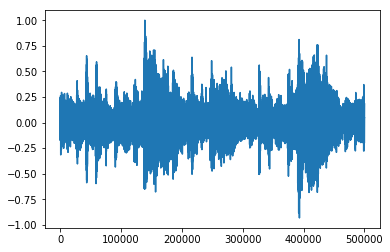

In [1]:
import scipy.io.wavfile as siowav
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt
%matplotlib inline

sr, sound = siowav.read("./test_sound.wav")
print(sr, sound.shape, type(sound[0]))
start = 500000
fin = 1000000
sound = sound.astype("float32")
# Cut and normalize original track
sound = sound[start:fin] / np.max(sound[start:fin])
n = sound.shape[0]
print("Problem dimension = {}".format(n))
plt.plot(sound)

In [2]:
ipd.Audio(sound, rate=sr)

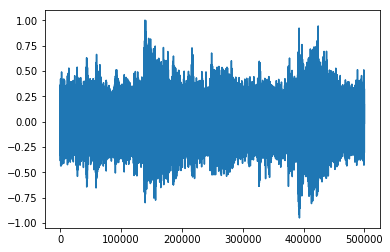

In [3]:
# Create corrupted signal and normalize it 
corrupt_sound = sound + 0.1 * np.random.randn(sound.shape[0])
corrupt_sound = corrupt_sound / np.max(np.abs(corrupt_sound))
plt.plot(corrupt_sound)

In [22]:
ipd.Audio(corrupt_sound, rate=sr)

### Удаление шума

- (5 pts) Воспользуйтесь подходов Compress sensing'a. Для этого запишите задачу, которая будет решаться с помощью библиотечной функции (работа которой обсуждалась на семинаре), а затем примените её к зашумлённому сигналу и выведите результат как с помощью функции ```plot```, так и с помощью ```Ipython.display.Audio```. Похожа ли мелодия на исходную? На что влияет выбор веса? Какой вес даёт наилучшее качество? Решите задачу для разных значений веса и подтвердите ваши утверждения экспериментом.

- (7 pts) Теперь вместо использования compress sensing'a добавьте требование на малость квадрата второй нормы вектора $z$, состоящего из разностей двух последовательных значений в векторе искомого сигнала $z_i = x_{i+1} - x_i$. 
    - (2 pts) Поставьте задачу минимизации и покажите, как она решается с помощью техники, аналогичной той, что была показана при рассмотрении линейной задачи наименьших квадратов на лекции. 
    - (1 pts) После этого с помощью функции ```np.linalg.lstsq``` решите задачу для различных значений веса и проверьте покож ли восстановленный сигнал на исходный, до добавления шума.
    - (2 pts) Проследите зависимость качества восстановления сигнала от значения веса около дополнительного слагаемого. На что он влияет?
    - (2 pts) Сравните восстановленный сигнал с тем, что был получен с помощью подхода compress sensing'a. Насколько сильно они отличаются? Почему?

- (5 pts) Как изменится результат в предыдущем пункте, если вектор $z$ будет состоять из аппроксимаций второй производной, то есть $z_i = x_{i+1} - 2x_i + x_{i-1}$? Проведите аналогичное исследование и сделайте вывод о том, какой способ регуляризации из трёх рассмотренных даёт наилучшее качество восстановления сигнала и почему?

## Задача 5:  QR разложение (22 pts)

- (5 pts) Реализуйте метод Грама-Шмидта для вычисления QR разложения. На вход подаётся прямоугольная матрица, функция возвращает матрицы ```Q``` и ```R``` из QR разложения. Прототип приведён ниже и не должен изменяться 

In [ ]:
# INPUT : rectangular matrix A
# OUTPUT: matrices Q - orthogonal and R - upper triangular such that A = QR
def gram_schmidt_qr(A):
    # your code is here
    return Q, R

- (5 pts) Реализуйте модифицированный метод Грама-Шмидта для вычисления QR разложения. На вход подаётся прямоугольная матрица, функция возвращает матрицы Q и R из QR разложения. Прототип приведён ниже и не должен изменяться

In [ ]:
# INPUT : rectangular matrix A
# OUTPUT: matrices Q - orthogonal and R - upper triangular such that A = QR
def modified_gram_schmidt_qr(A): # 5 pts
    # your code is here
    return Q, R

- (7 pts) Реализуйте алгоритм вычисления QR разложения, основанный на преобразованиях Хаусхолдера. На вход подаётся прямоугольная матрица, функция возвращает матрицы Q и R из QR разложения. Прототип приведён ниже и не должен изменяться. Обратите внимание на эффективность реализации операции умножения матриц Хаусхолдера для получения матрицы ```Q```.

In [ ]:
# INPUT : rectangular matrix A
# OUTPUT: matrices Q - orthogonal and R - upper triangular such that A=QR
def householder_qr(A): # 7 pts
    # your code is here
    return Q, R

- (2 pts) Сгенерируйте квадратную [матрицу Вандермонда](https://en.wikipedia.org/wiki/Vandermonde_matrix) $V\in\mathbb{R}^{n\times n},\ n = 20$ для вектора $x$: ```x = np.linspace(0,1,n)``` и вычислите QR разложение этой матрицы с помощью каждого из трёх реализованных вами алгоритмов. Вычислите насколько столбцы матрицы $Q$ ортогональны, то есть величину $\|Q^{\top}Q - I\|_2$. Объясните полученный результат.

- (3 pts) Изучите как скорость работы каждого из алгоритмов вычисления QR разложения зависит от числа строк и столбцов матрицы, для которой вычисляется QR разложение. Постройте два графика: на одном покажите зависимость времени вычисления от числа строк при фиксированном числе столбцов, а на другом, наоборот, зависимость времени вычисления от числа столбцов при неизменном числе строк. Выберите диапазоны изменения количества строк и столбцов такими, чтобы можно было увидеть асимптотическую скорость работы для больших матриц. 

## Задача 6. Сжатие полносвязных слоёв в нейросети (20 pts)

В этой задаче вам предлагается исследовать, как изменится точность предсказания нейросети, которая классифицирует изображения, если вместо полносвязных слоёв использовать их сжатое представление, полученное с помощью SVD. Результатом решения этой задачи должен быть график зависимости точности классификации на тестовой выборе от количества параметров нейронной сети.

#### Сначала скачаем данные CIFAR10

In [84]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets, transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

batch_size = 100

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_loader = torch.utils.data.DataLoader(datasets.CIFAR10('./', train=True, download=True, transform=transform), 
                                        batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(datasets.CIFAR10('./', train=False, transform=transform), 
                                          batch_size=batch_size, shuffle=True)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

#### Посмотрим, как выглядят изображения

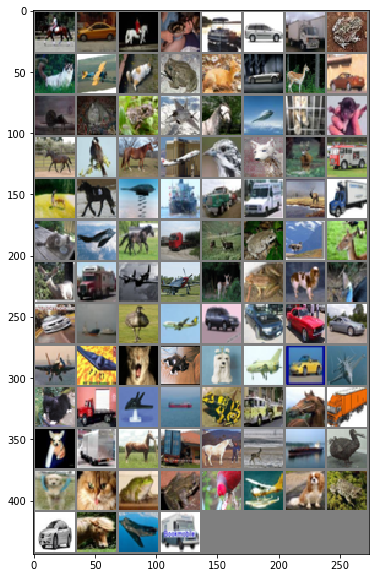

horse   car horse   cat  ship   car truck  frog


In [89]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(20, 10))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(8)))


### Архитектура нейронной сети

Для простоты и демонстрации принципа сжатия слоёв нейронных сетей рассмотрим архитектуру, состояющую только из полносвязных слоёв (то есть линейных преобразований) и стандартных ReLU-нелинейностей. Опять же для наглядности выбрали размерность 1000 для полносвязных слоёв. 

In [90]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(3 * 32 * 32, 1000)
        self.fc2 = nn.Linear(1000, 1000)
        self.fc3 = nn.Linear(1000, 1000)
        self.fc4 = nn.Linear(1000, 1000)
        self.fc5 = nn.Linear(1000, 1000)
        self.fc6 = nn.Linear(1000, 10)
        self.ReLU = nn.ReLU()

    def forward(self, x):
        x = self.fc1(x.view(-1, 3 * 32*32))
        x = self.ReLU(x)
        x = self.fc2(x)
        x = self.ReLU(x)
        x = self.fc3(x)
        x = self.ReLU(x)
        x = self.fc4(x)
        x = self.ReLU(x)
        x = self.fc5(x)
        x = self.ReLU(x)
        x = self.fc6(x)
        return F.log_softmax(x, dim=1)

#### Функции для обучения и тестирования результата после каждого прохождения всех данных 

In [91]:
def train(model, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))


In [92]:
def test(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
#             data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

### Зададим параметры обучения и вывода промежуточных результатов

In [93]:
log_interval = 50
epochs = 7

### Запускаем обучение с помощью метода оптимизации [Adam](https://arxiv.org/pdf/1412.6980.pdf%20%22%20entire%20document) 
Если у вас не очень мощный ноутбук, то придётся подождать некоторое время. 

In [94]:
model = Net()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

for epoch in range(1, epochs + 1):
    train(model,  train_loader, optimizer, epoch)
    test(model, test_loader)

Train Epoch: 1 [0/50000 (0%)]	Loss: 2.303912
Train Epoch: 1 [5000/50000 (10%)]	Loss: 1.987689
Train Epoch: 1 [10000/50000 (20%)]	Loss: 1.877347
Train Epoch: 1 [15000/50000 (30%)]	Loss: 2.018195
Train Epoch: 1 [20000/50000 (40%)]	Loss: 1.525423
Train Epoch: 1 [25000/50000 (50%)]	Loss: 1.779230
Train Epoch: 1 [30000/50000 (60%)]	Loss: 1.547251
Train Epoch: 1 [35000/50000 (70%)]	Loss: 1.603937
Train Epoch: 1 [40000/50000 (80%)]	Loss: 1.575551
Train Epoch: 1 [45000/50000 (90%)]	Loss: 1.565285

Test set: Average loss: 1.5938, Accuracy: 4327/10000 (43%)

Train Epoch: 2 [0/50000 (0%)]	Loss: 1.427085
Train Epoch: 2 [5000/50000 (10%)]	Loss: 1.645997
Train Epoch: 2 [10000/50000 (20%)]	Loss: 1.492367
Train Epoch: 2 [15000/50000 (30%)]	Loss: 1.503690
Train Epoch: 2 [20000/50000 (40%)]	Loss: 1.467856
Train Epoch: 2 [25000/50000 (50%)]	Loss: 1.201816
Train Epoch: 2 [30000/50000 (60%)]	Loss: 1.461097
Train Epoch: 2 [35000/50000 (70%)]	Loss: 1.468568
Train Epoch: 2 [40000/50000 (80%)]	Loss: 1.515223
T

- (3 pts) Вычислите SVD матрицы $1000 \times 1000$, которая соответствует любому слою подходящего размера обученной нейросети. Покажите на графике убывание сингулярных чисел. Какой вывод можно сделать?
- (12 pts) Создайте модель (аналогично классу ```Net```), которая на вход будет принимать экземпляр класса ```Net``` и ранг $r > 0$. Эта модель должна сжимать все полносвязные слои с помощью SVD разложения, из которого берутся только первые $r$ компонент. Также функция ```forward``` должна быть реализована с использованием сжатого представления полносвязных слоёв, а в остальном полностью повторять эту же функцию для несжатой обученной сети.
- (5 pts) Постройте зависимость точности предсказания на тестовой выборе от количества параметров, которое необходимо для этого. Это количество, очевидно, некоторым образом зависит от заданного ранга сжатия $r$. Также постройте зависимость времени вычисления от ранга сжатия. Объясните полученные результаты. Для вычисления времени используйте [%timeit](https://docs.python.org/3.6/library/timeit.html) c необходимыми параметрами (примеры смотрите в лекции) 